# Customer Reinforcement Learning (RL) Environment with OpenAI `gym`

Ladringan, Christine Love | September 1, 2023
<br>
<br>
<div style="text-align: justify"> <b>Reinforcement Learning</b> (RL) involves an agent learning to make decisions by interacting with an environment. The agent selects actions based on its understanding of the environment's current state, aiming to maximize cumulative rewards over time. These actions influence the environment, causing state transitions and yielding rewards. The agent refines its decision-making strategy by learning which actions lead to the most favorable outcomes in different states, thus navigating the complex interplay between exploration and exploitation to achieve optimal long-term results.</div>

Let us take a look at an example.

# Problem description and scenario explanation

## Navigating a Mine-Laden Field: A Reinforcement Learning Scenario

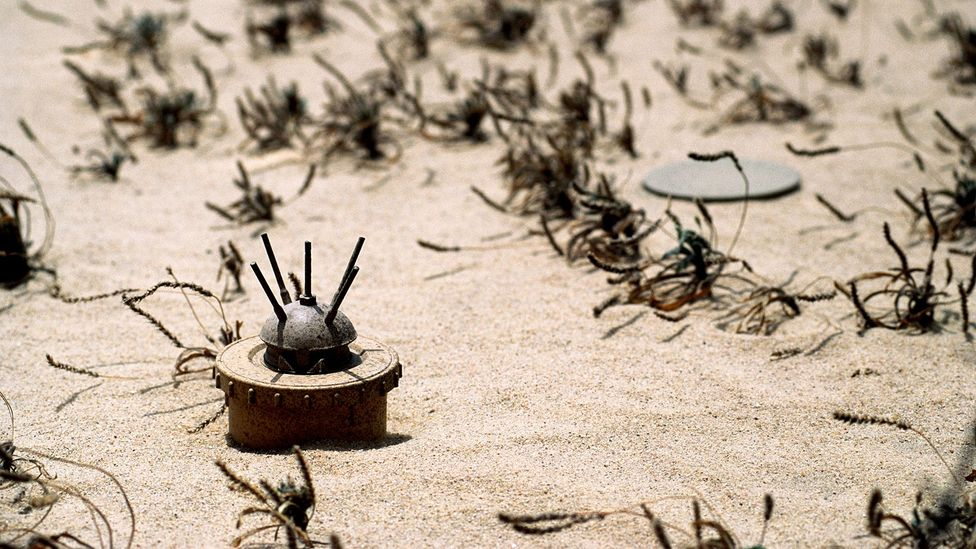


<br>
<div style="text-align: justify">In this scenario, we'll explore how RL can be applied to the challenge of a soldier navigating a mine-laden field. RL equips the soldier with the ability to make intelligent decisions in this dangerous environment.</div>



### Terminology

- **Agent**: The soldier who navigates the minefield.
- **Environment**: The mine-laden field itself, where the soldier operates.
- **Actions**: The available moves the soldier can make.
  - 0: Up
  - 1: Down
  - 2: Left
  - 3: Right
- **States**: The different possible locations in the field.
- **Rewards**:
  - -1: Penalty for every step the soldier takes.
  - -30: Penalized when the soldier steps on a land mine.
  - +100: Awarded when the soldier reaches the base.



### Objective

<div style="text-align: justify">The objective of the soldier is to learn a policy of actions that guides them through the mine-laden field. The soldier aims to navigate a safe path by making smart decisions based on RL. The feedback provided to the soldier is both positive and negative, guiding their behavior:</div> 

- Negative feedback: Stepping on mines results in negative rewards.
- Positive feedback: Safe movement and reaching the base lead to positive rewards.

# Environment

<div style="text-align: justify">OpenAI <code>gym</code> was used to make a virtual environment like a game where agents, like soldiers, learn to avoid hidden dangers such as land mines. They used their AI knowledge to create this world and help agents figure out safe paths. It's like a practice ground for agents to learn from mistakes and get better at handling risky situations.</div> 

Below shows the simple environment used to create the environment using OpenAI `gym`

In [1]:
# pip install gym
# pip install numpy
# pip install pandas

In [2]:
# Importing necessary libraries
import gym
from gym import spaces
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

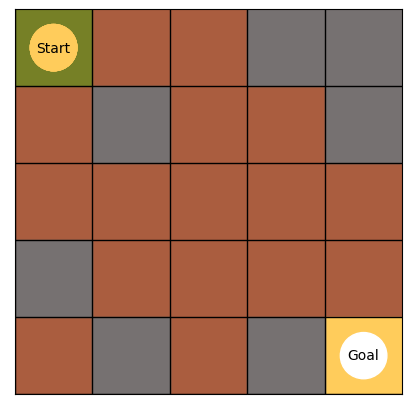

In [3]:
class SimpleGridWorld(gym.Env):
    def __init__(self):
        self.grid_size = 5
        self.action_space = spaces.Discrete(4)  
        self.observation_space = spaces.Discrete(self.grid_size * self.grid_size)

        self.start_position = (0, 0)
        self.goal_position = (self.grid_size - 1, self.grid_size - 1)
        self.obstacle_positions = [(3, 0), (1, 1), (0, 3), (0, 4), (1, 4), (4, 1), (4, 3)] 
        self.current_position = self.start_position
        
        self.max_steps = 30
        self.steps_taken = 0 

    def reset(self):
        self.current_position = self.start_position
        self.steps_taken = 0  
        return self._position_to_observation(self.current_position)

    def step(self, action):
        # Define the movement based on the action
        if action == 0:  # Up
            new_position = (max(0, self.current_position[0] - 1), self.current_position[1])
        elif action == 1:  # Down
            new_position = (min(self.grid_size - 1, self.current_position[0] + 1), self.current_position[1])
        elif action == 2:  # Left
            new_position = (self.current_position[0], max(0, self.current_position[1] - 1))
        elif action == 3:  # Right
            new_position = (self.current_position[0], min(self.grid_size - 1, self.current_position[1] + 1))
        
        self.steps_taken += 1
        done = False
        if new_position in self.obstacle_positions:
            self.current_position = new_position
            reward = -30  
            done = True    
        else:
            self.current_position = new_position
            reward = -1  
            done = False

            if self.current_position == self.goal_position:
                self.current_position = new_position
                reward += 100
                done = True  
                
        if self.steps_taken >= self.max_steps:
            done = True    

        return self._position_to_observation(self.current_position), reward, done, {}
    
    
    def _position_to_observation(self, position):
        return position[0] * self.grid_size + position[1]
    
    def render(self):
        fig, ax = plt.subplots(figsize=(self.grid_size, self.grid_size))

        ax.set_xlim(0, self.grid_size)
        ax.set_ylim(0, self.grid_size)
        ax.set_xticks(range(self.grid_size))
        ax.set_yticks(range(self.grid_size))

        for x in range(self.grid_size):
            ax.axvline(x, color='black', linewidth=1)
            ax.axhline(x, color='black', linewidth=1)
       
        # Safe
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if (i, j) not in self.obstacle_positions and (i, j) != self.current_position and (i, j) != self.goal_position:
                    ax.add_patch(plt.Rectangle((j, self.grid_size - 1 - i), 1, 1, color='#AA5D3F'))
        # Goal           
        ax.add_patch(plt.Rectangle((self.goal_position[1], self.grid_size - 1 - self.goal_position[0]), 1, 1, color='#FFCC5B'))
        ax.text(self.goal_position[1] + 0.5, self.grid_size - 1 - self.goal_position[0] + 0.5, 'Goal', ha='center', va='center', fontsize=10, color='black')
        
        goal_circle = plt.Circle((self.goal_position[1] + 0.5, self.grid_size - 1 - self.goal_position[0] + 0.5), radius=0.3, color='white')
        ax.add_patch(goal_circle)
        
        # Obstacle
        for obstacle_position in self.obstacle_positions:
            ax.add_patch(plt.Rectangle((obstacle_position[1], self.grid_size - 1 - obstacle_position[0]), 1, 1, color='#767171'))
        
        # Start
        ax.add_patch(plt.Rectangle((self.start_position[1], self.grid_size - 1 - self.start_position[0]), 1, 1, color='#768026'))
        ax.text(self.start_position[1] + 0.5, self.grid_size - 1 - self.start_position[0] + 0.5, 'Start', ha='center', va='center', fontsize=10, color='black')

        agent_circle = plt.Circle((self.current_position[1] + 0.5, self.grid_size - 1 - self.current_position[0] + 0.5), radius=0.3, color='#FFCC5B')
        ax.add_patch(agent_circle)
                    
        for action in range(4):
            if action == 0:  # Up
                circle = plt.Circle((self.current_position[1] + 0.5, self.grid_size - 1 - self.current_position[0] + 0.5), radius=0.3, color='#FFCC5B')
                ax.add_patch(circle)
            elif action == 1:  # Down
                circle = plt.Circle((self.current_position[1] + 0.5, self.grid_size - 1 - self.current_position[0] + 0.5), radius=0.3, color='#FFCC5B')
                ax.add_patch(circle)
            elif action == 2:  # Left
                circle = plt.Circle((self.current_position[1] + 0.5, self.grid_size - 1 - self.current_position[0] + 0.5), radius=0.3, color='#FFCC5B')
                ax.add_patch(circle)
            elif action == 3:  # Right
                circle = plt.Circle((self.current_position[1] + 0.5, self.grid_size - 1 - self.current_position[0] + 0.5), radius=0.3, color='#FFCC5B')
                ax.add_patch(circle)
            
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        plt.show()  
        
env = SimpleGridWorld()
env.render()

This is the equivalent environment in OpenAI `gym` for the problem scenario.
* **Green** - Represents the starting position of the agent
* **Yellow** - Represents the goal
* **Gray** - Represents area with landmines
* **Brown** - Represents safe area

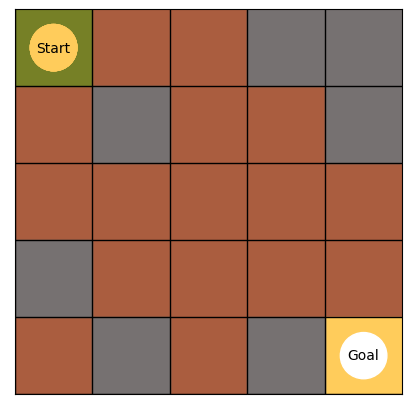

In [23]:
for step in range(100):
    action = env.action_space.sample()  
    observation, reward, done, _ = env.step(action)

    env.render()
    time.sleep(0.001)  
    clear_output(wait=True)  

    if done:
        if observation == env._position_to_observation(env.goal_position):
            print("Goal reached!")
            break
        else:
            print("Obstacle reached!")
            time.sleep(1)
            clear_output(wait=True)
            env.reset()  

The code above visually shows the interaction of the agent with the environment. Please note that Q-learning is not yet applied to the visualization above. 

In [7]:
# Total number of States and Actions
num_states = env.observation_space.n
num_actions = env.action_space.n
print( "States = ", num_states)
print( "Actions = ", num_actions)

States =  25
Actions =  4


There are **25** possible states since 5x5 grid environment was used, and **4** actions considered.

# B. Code implementation of the RL algorithm

## Q-Learning 
Q-learning is a RL method where an agent learns to make optimal decisions by updating its Q-values, representing expected rewards for actions in different states. It balances exploration and exploitation to maximize rewards. Q-values are updated using observed rewards and a discount factor, guiding the agent towards optimal actions. Below displays the Q-Learning update equation:

$$Q(s, a) = (1 - \alpha) \cdot Q(s, a) + \alpha \cdot \left( r + \gamma \cdot \max_{a'} Q(s', a') \right)\$$

- $Q(s, a)$ represents the Q-value for state $s$ and action $a$.
- $\alpha$ is the learning rate, determining how much new information should override old values.
- $r$ denotes the immediate reward received after taking action $a$ in state $s$.
- $\gamma$ is the discount factor, weighing the importance of future rewards.
- $s'$ signifies the resulting state after taking action $a$ in state $s$.
- $\max_{a'} Q(s', a')$ is the maximum Q-value among possible actions in state $s'$, estimating future rewards.

Q-learning aims to update Q-values iteratively to converge towards optimal action-value estimates.

In [13]:
learning_rate = 0.15         #𝛼
discount_factor = 0.995       #𝛾

## 𝜖-greedy Policy

The 𝜖-greedy policy is a simple strategy for selecting actions based on the current Q-value estimations in a reinforcement learning agent. This policy balances exploration and exploitation, which are crucial aspects of learning in an uncertain environment.

The policy works as follows:

1. With a probability of \(1 - 𝜖\), choose the action that has the highest Q-value. This is the exploitation step.
2. With a probability of \(𝜖\), choose any action at random. This is the exploration step.

The 𝜖-greedy policy embodies the trade-off between exploiting the current knowledge (taking the best-known action) and exploring new options (taking random actions) to gather more information about the environment.

## Exploration vs Exploitation 

The 𝜖-greedy policy helps the agent strike a balance between exploration and exploitation. Initially, it's common to start with a higher value of 𝜖 to encourage more exploration and less reliance on the Q-value estimates. As the agent gains experience and learns more about the environment, 𝜖 can be decayed over time.

In [14]:
initial_epsilon = 0.75   # Initial ε-greedy policy parameter
min_epsilon = 0.1        # Minimum ε value
epsilon_decay = 0.995    # Decay factor

## Q-Learning Algorithm

In [15]:
# Initialize Q-table to zeros
Q = np.zeros((num_states, num_actions))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [18]:
# Perform Q-learning
num_episodes = 1000
epsilon = initial_epsilon  
dataset = {'State': [], 'Action': [], 'Reward': [], 'Next_state': []} 
episode_info = {'Episode': [],'Steps': [],'Total_reward': []}

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0
    
    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()   # Choose a random action with probability ε
        else:
            action = np.argmax(Q[state, :])      # Choose the best action with probability 1-ε
        
        next_state, reward, done, _ = env.step(action)
        
        # Q-learning update
        best_next_action = np.argmax(Q[next_state, :])
        Q[state, action] += learning_rate * (reward + discount_factor * Q[next_state, best_next_action] - Q[state, action])
        
        dataset['State'].append(state)
        dataset['Action'].append(action)
        dataset['Reward'].append(reward)
        dataset['Next_state'].append(next_state)
        
        state = next_state
        steps += 1
        total_reward += reward
        
    episode_info['Episode'].append(episode + 1)
    episode_info['Steps'].append(steps)
    episode_info['Total_reward'].append(total_reward)
        
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

episode_info = pd.DataFrame(episode_info)
print("Q-learning training completed!")

Q-learning training completed!


In [19]:
episode_every_ten = pd.DataFrame(episode_info)
episode_every_ten[episode_every_ten['Episode'] % 10 == 0].reset_index(drop = True)

,Episode,Steps,Total_reward
0,10,18,-47
1,20,5,-34
2,30,11,-40
3,40,17,-46
4,50,27,73
...,...,...,...
95,960,11,89
96,970,10,90
97,980,8,92
98,990,8,92


> The dataframe above shows the total number of steps and total reward for every 10 episodes. As displayed on the table, the first few rewards are negative and over time it becomes positive.

# C. Generated random input dataset

Below is the dataset used to train Q-learning.

In [20]:
dataset = pd.DataFrame(dataset)
dataset

,State,Action,Reward,Next_state
0,0,3,-1,1
1,1,2,-1,0
2,0,1,-1,5
3,5,1,-1,10
4,10,0,-1,5
...,...,...,...,...
8381,13,1,-1,18
8382,18,0,-1,13
8383,13,1,-1,18
8384,18,3,-1,19


# D. Visualizations with explanations

In [21]:
# Q-table
q_table = pd.DataFrame(Q, columns=[f'Action {i}' for i in range(Q.shape[1])])
q_table

,Action 0,Action 1,Action 2,Action 3
0,86.659397,88.690673,86.996822,80.676407
1,30.923307,-27.772467,86.284087,0.945518
2,-2.363064,19.552481,-2.340328,-24.979703
3,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000
5,86.541121,90.141380,87.070818,-29.997582
6,0.000000,0.000000,0.000000,0.000000
7,-0.450756,92.145800,-24.093768,12.855003
8,-24.979703,92.330813,23.317944,-20.382687
9,0.000000,0.000000,0.000000,0.000000


> The Q-table you provided represents the learned Q-values for different state-action pairs in a Q-learning algorithm. Each row corresponds to a state, and each column corresponds to an action. The values within the table represent the estimated expected cumulative rewards (Q-values) that an agent can obtain by taking a particular action from a specific state.

> For instance, in the case of state 5, the "Down" action (Action 1) has the highest Q-value, indicating that the agent expects to receive a higher cumulative reward by moving downward from state 5.

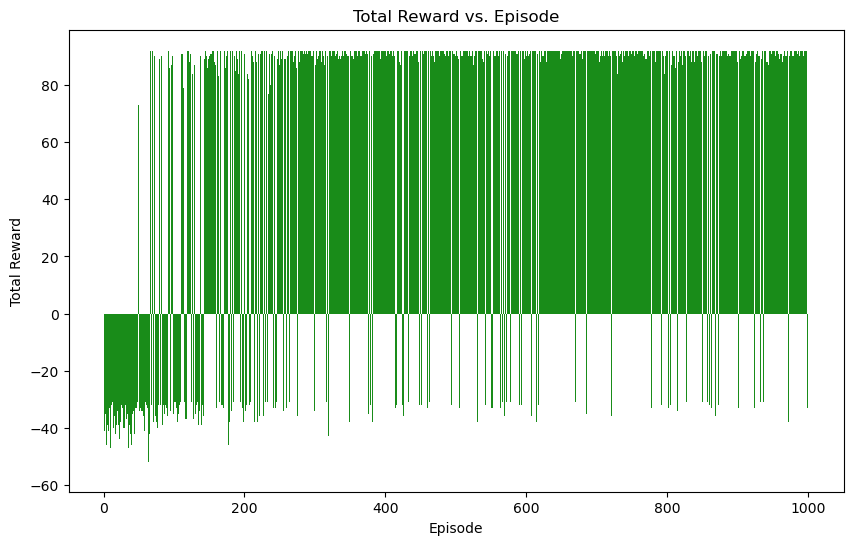

In [22]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(episode_info['Episode'], episode_info['Total_reward'], color = 'green', width = 1, alpha = 0.9)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward vs. Episode')
plt.show()

> The graph above depicts the learning progress of an agent over multiple episodes in a reinforcement learning task. Specifically, it shows how the total reward obtained by the agent changes as it interacts with the environment and learns from its experiences.

> At the beginning of training (first few episodes), the agent's actions are mostly random as it explores the environment. Since the agent has not learned a good policy yet, the total rewards obtained are generally low and even negative. 

> As the agent gains experience and updates its Q-values based on rewards and transitions, it starts to learn more effective strategies for navigating the environment. This is reflected in the graph by a gradual increase in total rewards over time.